# Iris-Flower #
Numpy will be used for any computational operations.
We’ll use Matplotlib and seaborn for data visualization.
Pandas help to load data from various sources like local storage, database, excel file, CSV file, etc.

In [109]:
#Import necessary packages
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

%matplotlib inline

In [110]:
# Assigning column names and reading the dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class_labels']
df = pd.read_csv('iris.data', names=columns)
df.head(-10) # Display the first 5 and last 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [128]:
# Check for missing values in the dataset
df.isnull().sum()

# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)

number of duplicated rows are 3
     sepal_length  sepal_width  petal_length  petal_width    Class_labels
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


In [112]:
df.describe() # statistical summary of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


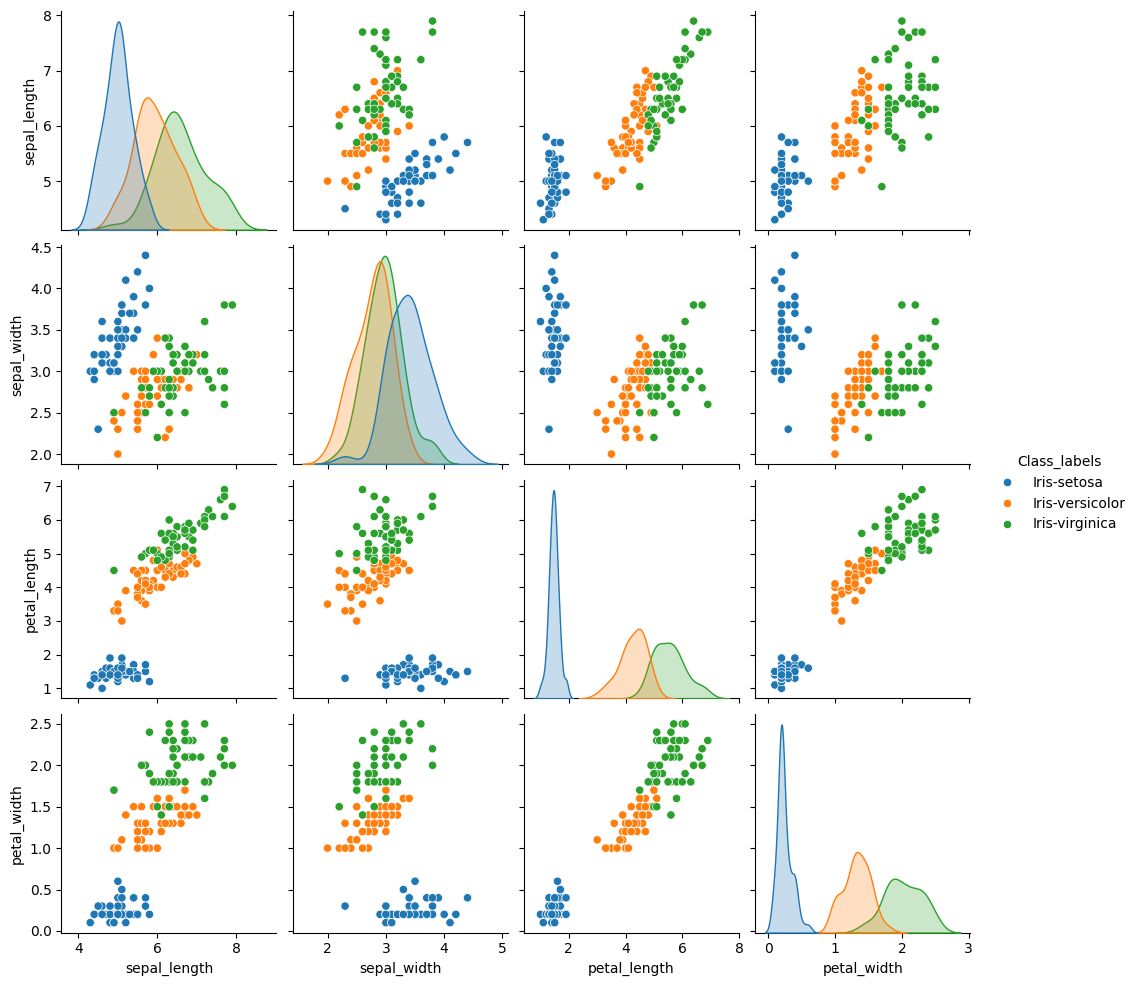

In [113]:
sns.pairplot(df, hue='Class_labels') # visualizing whole dataset

# Summary #

### A classifier trained on petal lenght and width features will likely perform well. 
### Why? 
- It's seen from visualization that iris-setosa (blue) is separated from another two flower species

- And iris-versicolor (orange) and iris-virginica (green) partially overlapping, but still have differences.


### Sepal features alone are less effective for distinguishing species 
### Why?
- sepal_length and sepal_width show much more overlap between species.

- Particularly sepal_width: all species are intermixed.

- sepal_length shows some trend, but not clearly separated.

In [114]:
data = df.values # Convert DataFrame to NumPy array
X = data[:,0:4] # taking all rows and first 4 columns
# X contains the features (sepal length, sepal width, petal length, petal width)

Y = data[:,4] # taking all rows and last column
# Y contains the class labels (species of iris flower)

In [115]:
# Calculate the average of each feature for each class label using list comprehension
Y_Data = np.array(
    [np.average(X[:, i][Y==j].astype('float32')) 
     for i in range (X.shape[1]) 
     for j in (np.unique(Y))
]
)

# Reshape the Y_Data to match the number of classes and features
Y_Data_reshaped = Y_Data.reshape(4, 3)

# Transpose the array to have classes as rows and features as columns
Y_Data_reshaped = np.swapaxes   (Y_Data_reshaped, 0, 1) 

# set x-axis and bar width
X_axis = np.arange(len(columns)-1)
width = 0.25

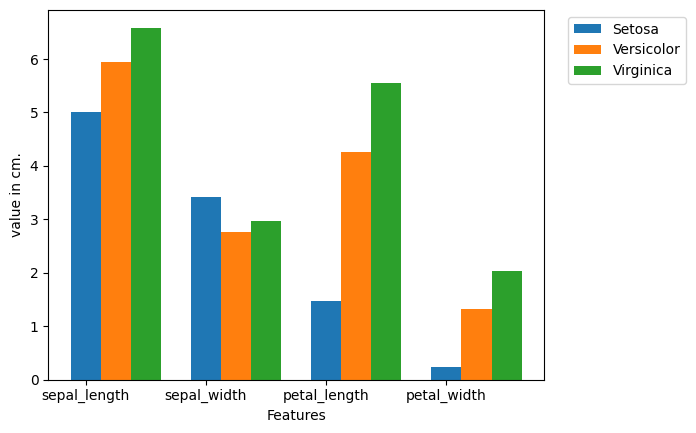

In [116]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label='Setosa')
plt.bar(X_axis + width, Y_Data_reshaped[1], width, label='Versicolor')
plt.bar(X_axis + 2*width, Y_Data_reshaped[2], width, label='Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

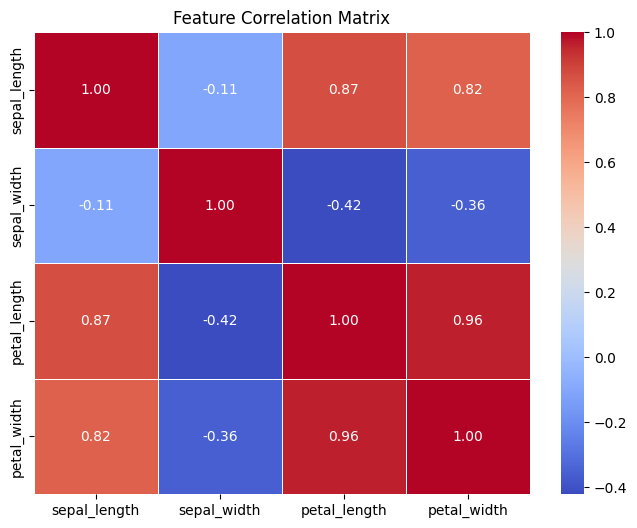

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Model Training #

In [117]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [118]:
# Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train) # training the model wtih default parameters

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Model Evaluation #

In [119]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [120]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



- The classification report gives a detailed report of the prediction.

- Precision defines the ratio of true positives to the sum of true positive and false positives.

- Recall defines the ratio of true positive to the sum of true positive and false negative.

- F1-score is the mean of precision and recall value.

- Support is the number of actual occurrences of the class in the specified dataset.

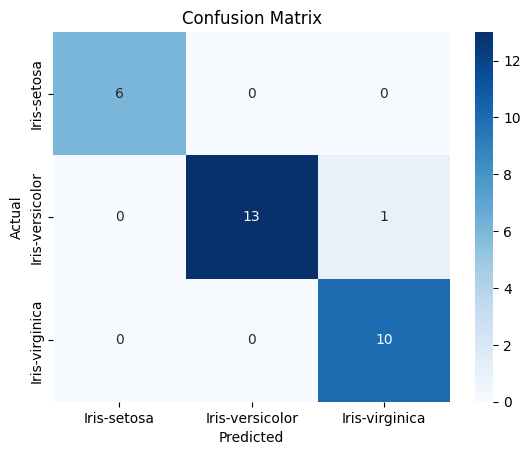

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions, labels=np.unique(y_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [122]:
X_new = np.array([
    [3, 2, 1, 0.2], 
    [4.9, 2.2, 3.8, 1.1 ], 
    [5.3, 2.5, 4.6, 1.9 ],
    [5.1, 3.5, 1.4, 0.2]
    ])
#Prediction of the species from the input vector, each row is a new sample
prediction = model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [123]:
import pickle

with open('IrisModel.pickle', 'wb') as f:
    pickle.dump(model, f)

In [124]:
# load the model from the file
with open('IrisModel.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
model.predict(X_new)  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [126]:
loaded_model.predict(X_new)  # Verify that the loaded model can make predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [132]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Classification Report: TRAIN")
print(classification_report(y_train, y_train_pred))

print("Classification Report: TEST")
print(classification_report(y_test, y_test_pred))

Classification Report: TRAIN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        44
Iris-versicolor       0.97      0.94      0.96        36
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Classification Report: TEST
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

